<center><font size="+4">Programming & Data Analytics & AI 2 PM 2024/2025</font></center>
<center><font size="+2">Sant'Anna School of Advanced Studies, Pisa, Italy</font></center>
<center><img src="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/raw/main/PDAI/jupyter/jupyterNotebooks/images/sssaLEMBEDSdtu.png" width="900" alt="L'EMbeDS"></center>

<center><font size="+2">Course responsible</font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>

---

<center><font size="+2">Notebook for Class 7 </font></center>
<center><font size="+2">Dependency graphs and Heuristic miner. Data lab
</font></center>

---
---

In [32]:
url_github_repo="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/raw/main/PDAI/"

pm_slides=url_github_repo+'jupyter/jupyterNotebooks/images/PM/'
from IPython.display import Image, display

In [33]:
#Here we create a 'string' variable pointing to our repository...
url1 = 'https://raw.githubusercontent.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/main/PDAI/jupyter/jupyterNotebooks/simplifiedCustomerComplaintHandling.xes'

urls=[url1]

import urllib.request
from pathlib import Path

for url in urls:
    print('Downloading',url)
    urllib.request.urlretrieve(url,Path(url).name)

For an informed discussion on this topic, I recommend you watching classes of Module 3 of the [Coursera course on PM](https://www.coursera.org/learn/process-mining/home/welcome)
- https://www.coursera.org/learn/process-mining/home/module/3



> Below we provide screenshots from some slides used above

# Quality of discovered models

## Four Quality Criteria For Process Discovery

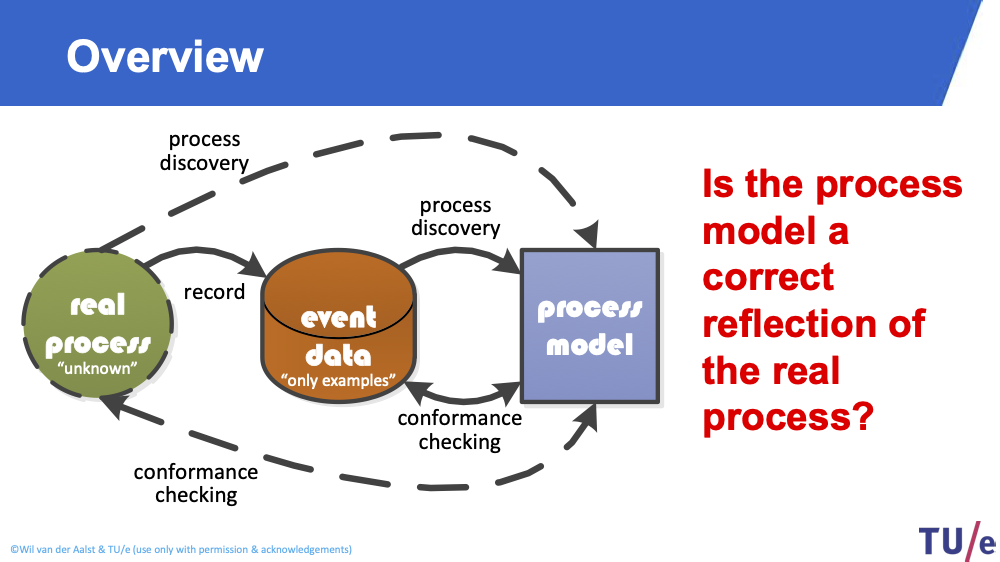

In [34]:
img=Image(pm_slides+'overviewPM.png',width=700)
display(img)

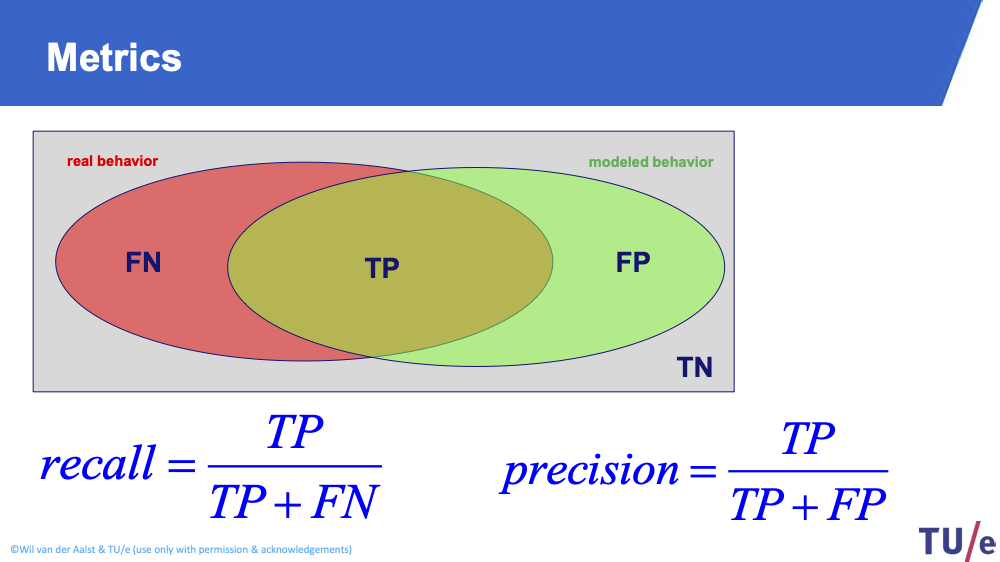

In [35]:
display(Image(pm_slides+'graphicalConfusionMetrics.png',width=700))

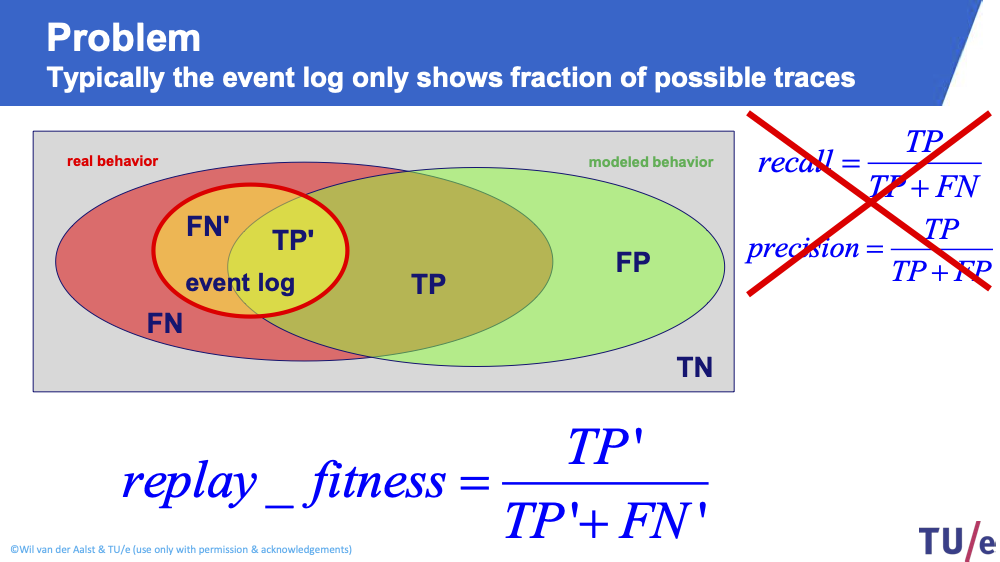

In [36]:
display(Image(pm_slides+'graphicalConfusionMetricsIssue.png',width=700))

Replay-fitness is essentially the classic Recall
- The only difference is that in PM people stresses that event logs are typically incomplete
- Also: we have a very unbalanced training set
  - The event log only contains positive examples (the 1), and not negative examples (the 0).
 
We are also interested in having a qualitative view on the labels
- Not all 0 are the same
- I want to know _how much wrong_ is a trace

Quality of a model. As discussed in the previous class:
- as usual in Data Science, we have trade offs!


How much of the traces in the log we can replicate 
- __Fitness__ vs __Simplicity__
  - Fitness: Ability to replay the observed behavior
    - Can we replay the log?
  - Simplicity: Keep model simple (Occam's razor)

How much of the traces NOT in the log we can generate <br/>
__Generalization__ vs __Precision__
- Generalization: Avoid overfitting
  - A model may become very complex to try describing precisely only the traces in the log
  - It has low generality 
- Precision: Avoid underfitting
  - We only produce traces appearing in the event log (maybe not all)

Fitness
- if we can replay all the traces in the event log (and don't care about whether we generate additional ones) we get 100%

Precision
- if we can replay only traces in the event log, maybe not all, but we don't generate any spurious traces we get 100%

The _flower model_ allows for 
- essentially any trace
- it has 100% fitness
- it has very low precision

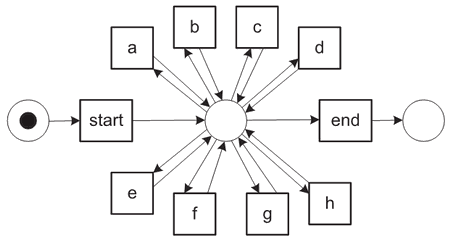

In [37]:
display(Image('https://raw.github.com/alexeygrigorev/wiki-figures/master/ulb/bpm/pm/pm-flower.png'
              ,width=700))

## Business Process Model and Notation (BPMN)

# Dependency Graphs

## Dependency Graphs

__Dependency graphs__
- Are very important to get the _causal structure_ of the process
- Often, it is an intermediate model/representation given in input to algorithms that learn richer formalisms (e.g., __BPMN__ models)

We have seen then in Disco!

We have seen them in the pm4py classes:

parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

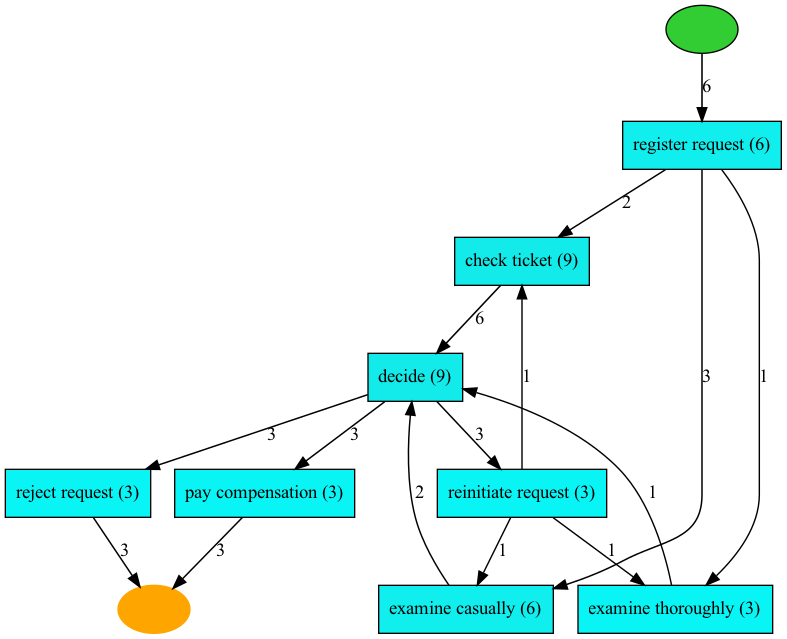

In [38]:
import pm4py 

event_log = pm4py.read_xes("simplifiedCustomerComplaintHandling.xes")
map = pm4py.discover_heuristics_net(event_log)
pm4py.view_heuristics_net(map)

Or... open __Disco__!

Or, more simply...

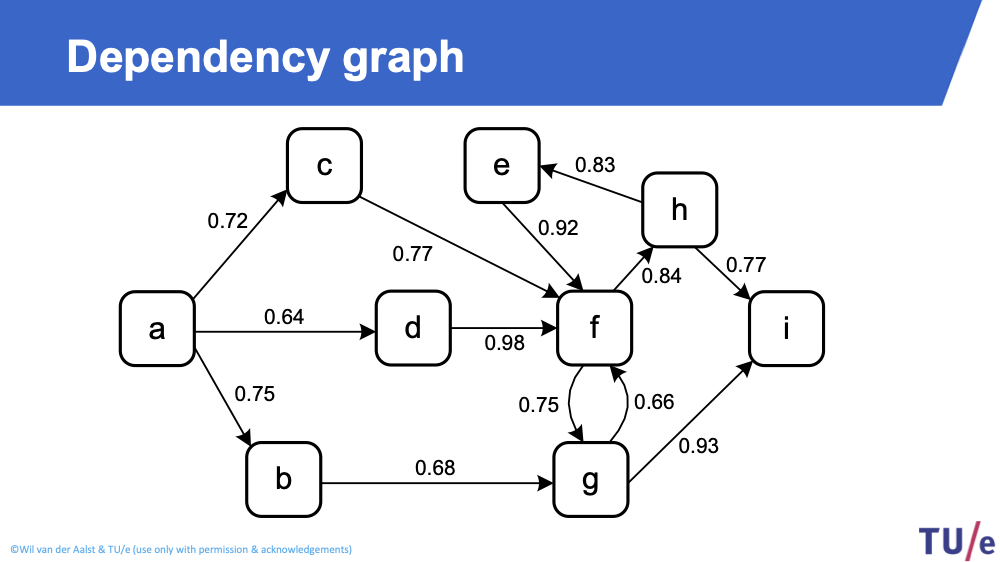

In [39]:
display(Image(pm_slides+'depGraph.png',width=700))

As we have discussed, in this graph
- Nodes are activities
- Edges are labeled with quantitative information
  - occurreneces
  - confidence in the presence of such edge

Furthermore, as we discussed, such a model 
- is not _executable_
- `f` has many incoming edges
  - We don't know how to execute it precisely
  - We do not have the _patterns_ we have seen in the previous class

In particular:
- the edges in a dependency graph
- correspond to the _sequence_ relation (the arrows) in the footprint of a log!

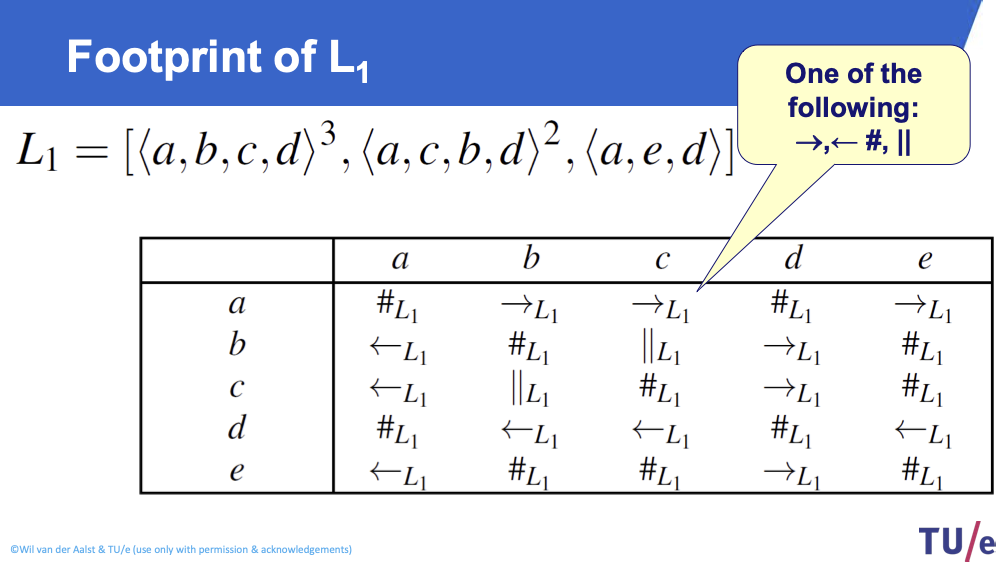

In [40]:
display(Image(pm_slides+'footprint.png',width=700))

You can also build the dependency graph underlying a Petri net
- just drop the places

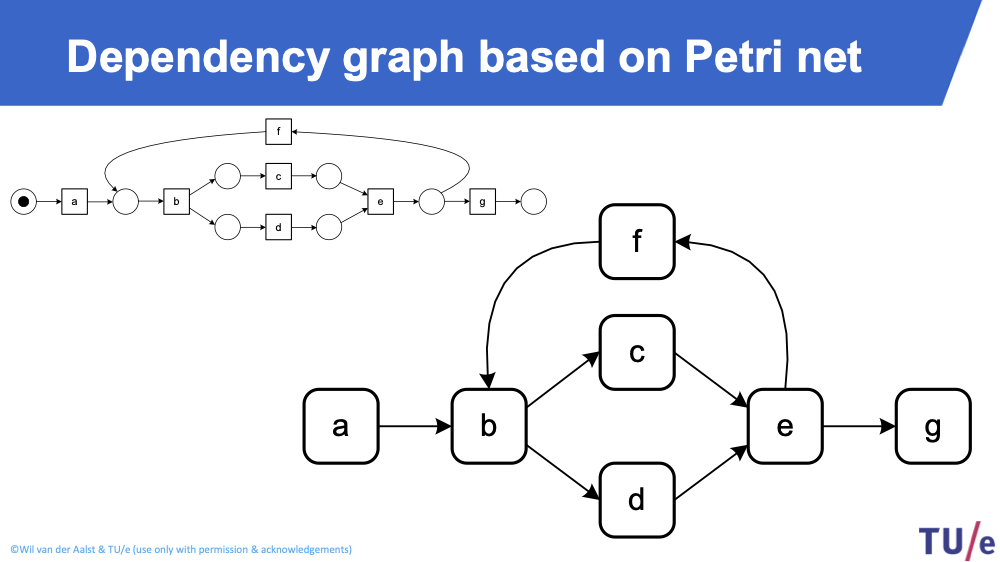

In [41]:
display(Image(pm_slides+'pn2dg.png',width=700))

We call dependency graphs _fuzzy models_
- No precise semantics: we can't execute them
- Can be created in many ways. Often using heuristics
- Most mining algorithms start from dependency graphs

__Causal nets__

There exist a sort of _richer dependency graphs_ known as __Causal nets (c-nets)__. These are 
- able to better represent the represent relations among activities
  - Do you remember XOR, OR, AND relations?
- are the actual output of several mining techniques
  - e.g., heuristic miner 
- still, they cannot be executed

We are not to treat them in details in this course. 
- Anyway, this picture should provide an intuitive overview to them

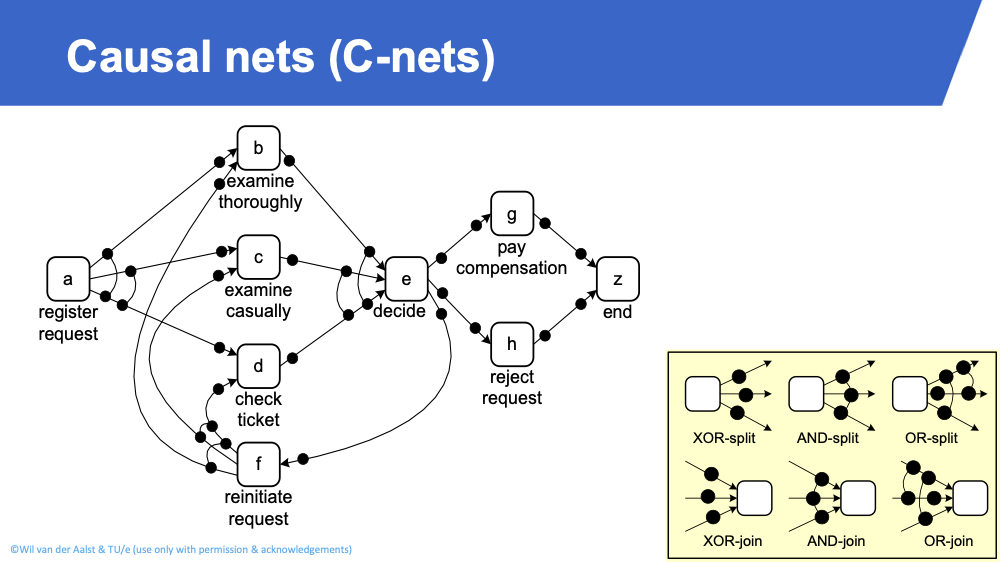

In [42]:
display(Image(pm_slides+'cnets.png',width=700))

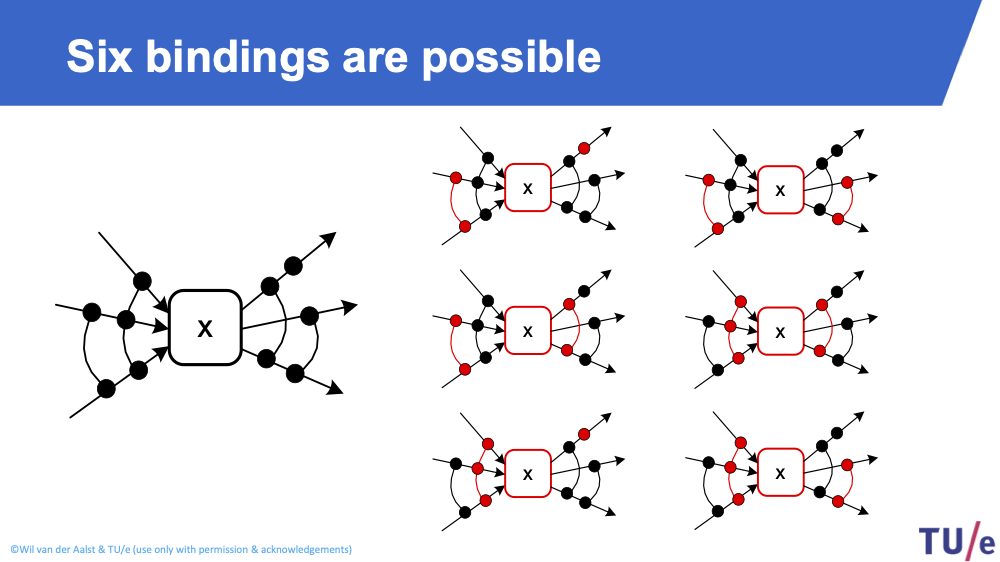

In [43]:
display(Image(pm_slides+'cnetsBindings.png',width=700))

## Learning Dependency Graphs

In [44]:
display(Image(pm_slides+'heuristicMining.png',width=700))

HTTPError: HTTP Error 404: Not Found